# image reading

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('lanewithout.png')

plt.imshow(img)

# color spaces

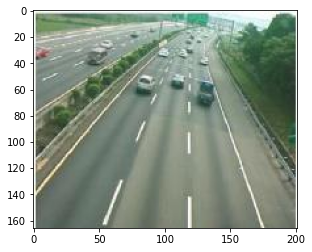

In [2]:
img1= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

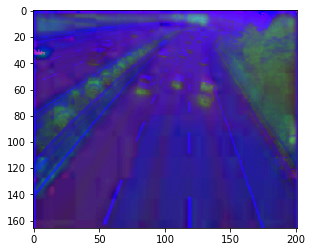

In [3]:
img2= cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img2)

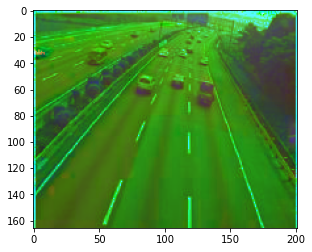

In [4]:
img3= cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
plt.imshow(img3)

'cv2.imshow("gray",img4)\nk = cv2.waitKey(0)\nif k == 27:         # wait for ESC key to exit\n    cv2.destroyAllWindows()'

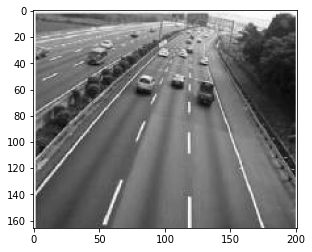

In [5]:
img4= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img4, cmap = plt.get_cmap('gray'))

# edge detection

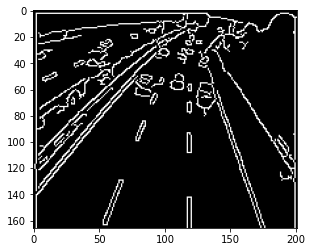

In [150]:
#canny edge detection

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),0)
canny = cv2.Canny(blur,50,150)
plt.imshow(canny,cmap='gray')

In [148]:
# Calcution of Sobelx 
sobelx = cv2.Sobel(img4,cv2.CV_64F,1,0,ksize=5) 
      
# Calculation of Sobely 
sobely = cv2.Sobel(img4,cv2.CV_64F,0,1,ksize=5) 

#laplacian edge detection
laplacian = cv2.Laplacian(img4,cv2.CV_64F) 


In [149]:
sobelx[sobelx<0]=0
sobelx

sobely[sobely<0]=0
sobely

laplacian[laplacian<0]=0
laplacian

array([[ 12.,   0.,   0., ...,   0.,   0.,   0.],
       [ 24.,   0.,   0., ...,   0.,  25.,   0.],
       [  0.,   0.,  53., ...,   0.,   0.,   1.],
       ...,
       [  0.,   0., 135., ...,   0., 138.,   0.],
       [  0.,   0., 135., ...,   1., 138.,   0.],
       [  0.,   0., 135., ...,   5., 139.,   0.]])

'cv2.imshow("sobelx",sobelx)\nk = cv2.waitKey(0)\nif k == 27:         # wait for ESC key to exit\n    cv2.destroyAllWindows()'

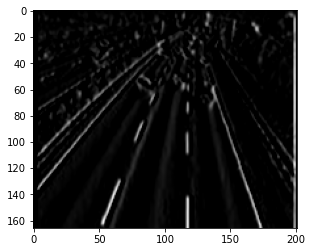

In [16]:
plt.imshow(sobelx,cmap='gray')
'''cv2.imshow("sobelx",sobelx)
k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()'''

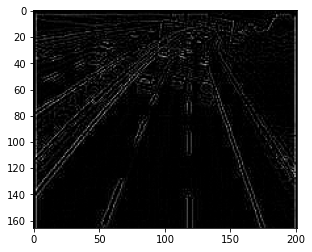

In [17]:
plt.imshow(laplacian,cmap='gray')

In [122]:
'''#canny edge detection
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny = cv2.Canny(blur,50,150)
    
    return canny
'''

# Selecting region of interest

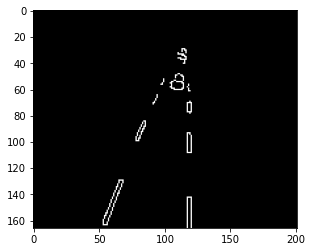

In [159]:
def region_of_interest(image):
    height = image.shape[0]
    polygons= np.array([
                            [(44, height), (129, height), (115, 20)]
                        ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    segment = cv2.bitwise_and(image, mask)
    return segment
plt.imshow(region_of_interest(canny),cmap='gray')

# using hough transform 

In [160]:
lines = cv2.HoughLinesP(region_of_interest(canny), 2, np.pi / 180, 25, np.array([]), minLineLength = 40, maxLineGap = 40)
print(lines)

[[[113  29 120 165]]

 [[ 55 163  85  84]]

 [[118 142 119  69]]

 [[114  29 118  93]]

 [[ 53 163  83  85]]

 [[ 56 161  99  53]]

 [[116  30 120 108]]]


In [161]:
#function to display lines detected by hough transform

def display_lines(image,lines):
    line_image = np.zeros_like(image)
    for line in lines:
        x1,y1,x2,y2 = line.reshape(4)
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),4)
    return line_image

[[[113  29 120 165]]

 [[ 55 163  85  84]]

 [[118 142 119  69]]

 [[114  29 118  93]]

 [[ 53 163  83  85]]

 [[ 56 161  99  53]]

 [[116  30 120 108]]]


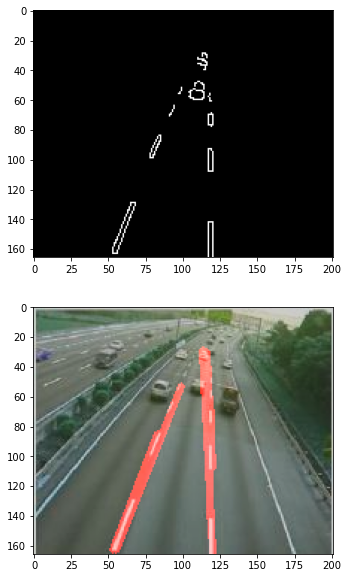

In [166]:
laneimg = np.copy(img)
gray = cv2.cvtColor(laneimg, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),0)
canny = cv2.Canny(blur,50,150)
#plt.imshow(canny,cmap='gray')
cropped_img = region_of_interest(canny)
lines = cv2.HoughLinesP(cropped_img, 2, np.pi / 180, 25, np.array([]), minLineLength = 40, maxLineGap = 40)
print(lines)
line_image = display_lines(laneimg,lines)
overlay_img = cv2.addWeighted(laneimg,0.8,line_image,1,1)

plt.figure(2,figsize=(10,10))
plt.subplot(211)
plt.imshow(cropped_img,cmap='gray')

plt.subplot(212)
plt.imshow(overlay_img)
plt.show()